In [24]:
import pandas as pd
import numpy as np
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

    


3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1.14.3
0.23.0


In [2]:
# Read in person file 
person_df = pd.read_csv("person.csv")

In [3]:
#Basic checks 
person_df.shape

(86474, 68)

In [4]:
person_df.head()

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,73,1,1,9,...,9999,999,99,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,73,10,1,19,...,8888,999,99,0,0,0,8,0,0,0
2,1,10002,1,1,2,0,73,10,1,19,...,1959,0,0,0,0,0,0,6,1,0
3,1,10003,1,1,1,0,73,1,1,2,...,220,0,0,0,0,0,0,7,1,0
4,1,10003,1,2,1,0,73,1,1,2,...,8888,999,99,0,0,0,8,0,0,0


In [5]:
person_df.columns

Index(['STATE', 'ST_CASE', 'VE_FORMS', 'VEH_NO', 'PER_NO', 'STR_VEH', 'COUNTY',
       'DAY', 'MONTH', 'HOUR', 'MINUTE', 'RUR_URB', 'FUNC_SYS', 'HARM_EV',
       'MAN_COLL', 'SCH_BUS', 'MAKE', 'MAK_MOD', 'BODY_TYP', 'MOD_YEAR',
       'TOW_VEH', 'SPEC_USE', 'EMER_USE', 'ROLLOVER', 'IMPACT1', 'FIRE_EXP',
       'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS', 'REST_USE', 'REST_MIS',
       'AIR_BAG', 'EJECTION', 'EJ_PATH', 'EXTRICAT', 'DRINKING', 'ALC_DET',
       'ALC_STATUS', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DRUG_DET', 'DSTATUS',
       'DRUGTST1', 'DRUGTST2', 'DRUGTST3', 'DRUGRES1', 'DRUGRES2', 'DRUGRES3',
       'HOSPITAL', 'DOA', 'DEATH_DA', 'DEATH_MO', 'DEATH_YR', 'DEATH_HR',
       'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS', 'P_SF1', 'P_SF2',
       'P_SF3', 'WORK_INJ', 'HISPANIC', 'RACE', 'LOCATION'],
      dtype='object')

## Gender Analysis

In [6]:
person_df.SEX.value_counts()

1    56219
2    28751
9     1094
8      410
Name: SEX, dtype: int64

In [24]:
# Remove 8 and 9 since those are not reported or unknown 
# Assign to a new variable 
gender_df = person_df[(person_df.SEX == 1) | (person_df.SEX ==2)]


In [86]:
gender_df['SEX'].value_counts()

1    56219
2    28751
Name: SEX, dtype: int64

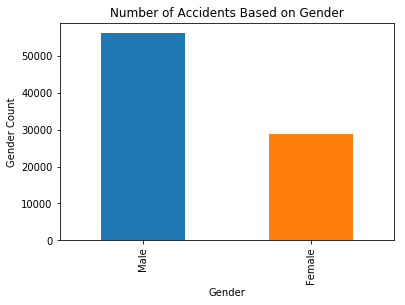

In [28]:
# Plot a bar chart to show accident fatalities by gender 

gender_df.groupby('SEX').size().plot(kind = 'bar')

# Give the chart a name. Give the x and y axis a name 
plt.xlabel('Gender')
plt.ylabel('Gender Count')
plt.title('Number of Accidents Based on Gender')

# Rename the x-ticks 
x_gender = (np.arange(2))
gender_xlabel = ('Male', 'Female')
plt.xticks(x_gender, gender_xlabel, rotation = 'vertical')

plt.show()

#get_xticklabels(np.arrange(4),('Male', 'Female', 'Not Reported', 'Unknown'))
#return airline_df, len(airline_df.index), len(airline_df.columns)

    

#print(df)
#print("Number of rows: ",size)
#print("Number of columns: ",num_cols)

## Vehicle Make Analysis

In [15]:
person_df['MAKE'].value_counts()

12.0    11711
20.0    11357
49.0     6458
37.0     5739
7.0      5216
35.0     3836
23.0     2541
72.0     2377
2.0      1971
6.0      1659
55.0     1641
98.0     1613
82.0     1499
18.0     1388
63.0     1374
22.0     1289
99.0     1056
53.0      912
41.0      820
30.0      792
76.0      790
84.0      788
34.0      764
14.0      763
59.0      728
19.0      706
24.0      685
51.0      680
87.0      627
52.0      624
        ...  
21.0      382
86.0      287
32.0      257
38.0      198
93.0      136
90.0      125
9.0       102
3.0        97
39.0       96
67.0       88
62.0       79
92.0       73
50.0       68
69.0       68
94.0       65
45.0       55
77.0       46
47.0       46
71.0       44
89.0       34
36.0       24
29.0       19
10.0        7
65.0        7
64.0        6
25.0        5
97.0        4
1.0         4
60.0        1
74.0        1
Name: MAKE, Length: 67, dtype: int64

In [19]:
# Look at the top 10 vehicles that were in accidents 
person_df['MAKE'].value_counts().nlargest(10)


12.0    11711
20.0    11357
49.0     6458
37.0     5739
7.0      5216
35.0     3836
23.0     2541
72.0     2377
2.0      1971
6.0      1659
Name: MAKE, dtype: int64

Text(0,0.5,'Number of Vehicles')

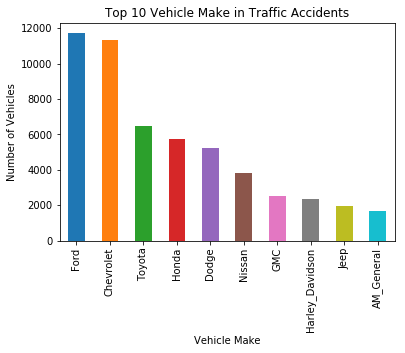

In [89]:
#Make of vehicles involved in accident - bar plot 
x = np.arange(10)
v_make = ('Ford', 'Chevrolet', 'Toyota', 'Honda', 'Dodge', 'Nissan', 'GMC', 'Harley_Davidson', 'Jeep', 'AM_General')
person_df['MAKE'].value_counts().nlargest(10).plot(kind = 'bar')
plt.xticks(x, v_make, rotation = 'vertical')
plt.title('Top 10 Vehicle Make in Traffic Accidents')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Vehicles')


## Air-bag Analysis

Not enough space in report

In [67]:
# Was an airbag deployed? 

person_df.groupby('AIR_BAG').size()

# There are many data points that should be removed. 0, 28, 97, 98, 99 

AIR_BAG
0     18244
1     16929
2      1624
3       343
7        58
8      7469
9      3028
20    26774
28       10
97     7661
98     1231
99     3103
dtype: int64

In [68]:
air_bag_df = person_df[(person_df.AIR_BAG != 98) & 
                           (person_df.AIR_BAG != 99) & 
                           (person_df.AIR_BAG != 97)& 
                           (person_df.AIR_BAG != 0) & 
                           (person_df.AIR_BAG != 28)]

In [74]:
air_bag_df['AIR_BAG'].value_counts()

20    26774
1     16929
8      7469
9      3028
2      1624
3       343
7        58
Name: AIR_BAG, dtype: int64

In [171]:
# Deployed vs. Not Deployed 

dep_df = air_bag_df['AIR_BAG'].replace([1,2,3,7,8,9], 'Not Deployed')
#air_bag_df.index.names = ['Air_Bag']

#dep_df.value_counts()

ab_chart = pd.DataFrame(dep_df.value_counts())

ab_chart.index.names = ['Airbag Deployment']

ab_chart.rename(index={20:"Deployed"}, inplace=True)


ab_chart 
#pd.DataFrame(x, columns = ['Deploy', 'Count'])




,AIR_BAG
Airbag Deployment,
Not Deployed,29451
Deployed,26774


## Manner of Collision Analysis

No space for tables/graphs - can write about 

In [70]:
# Verify if it is consistent with vehicle make 

person_df['MAN_COLL'].value_counts()

0     41670
6     20247
2     11047
1      9104
7      2092
8      1596
11      275
99      186
9       157
98       86
10       14
Name: MAN_COLL, dtype: int64

In [71]:
# Remove 98 and 99 since they are not reported and unknown 

manner_coll_df = person_df[(person_df.MAN_COLL != 98) & 
                           (person_df.MAN_COLL !=99)]


In [72]:
manner_coll_df['MAN_COLL'].value_counts()


0     41670
6     20247
2     11047
1      9104
7      2092
8      1596
11      275
9       157
10       14
Name: MAN_COLL, dtype: int64

In [73]:
#Don't include in report 
manner_coll_df.groupby('MAN_COLL').agg({'MAN_COLL':np.size}).rename(columns={'MAN_COLL':'Manner_of_Collision'}).sort_values(by = 'Manner_of_Collision', ascending = False)

# most collide front to front then at an angle 

,Manner_of_Collision
MAN_COLL,
0,41670
6,20247
2,11047
1,9104
7,2092
8,1596
11,275
9,157
10,14


## Damaged Areas on Vehicle Analysis

In [51]:
# Read in damage file 
damage_df = pd.read_csv("Damage.csv")


In [52]:
damage_df.shape

(214891, 4)

In [56]:
# Data for this column is okay. Remove 99 which is unknown 
damage_df.groupby('MDAREAS').size()


MDAREAS
1     18111
2     14194
3     13565
4     11178
5     11221
6     11655
7     11835
8     12029
9     14966
10    15413
11    19220
12    36553
13    14120
14     8467
15      912
99     1452
dtype: int64

In [61]:
# Remove unknown 
damaged_area_df = damage_df[(damage_df.MDAREAS != 99)]


In [62]:
# Make a table to see where the damage is on the vehicle 

damage_table = damaged_area_df.groupby(['MDAREAS']).agg({'MDAREAS':np.size}).rename(columns={'MDAREAS' : 'Number of Vehicles'}).sort_values(by='Number of Vehicles', ascending = False)
damage_table.index.names = ['Damaged Areas']
damage_table

,Number of Vehicles
Damaged Areas,
12,36553
11,19220
1,18111
10,15413
9,14966
2,14194
13,14120
3,13565
8,12029


## Driver Distraction Analysis

No space for tables/graphs - can write about  

In [63]:
# Driver distraction 
# Read in file 

distract_df = pd.read_csv("Distract.csv")

distract_df.shape


(52757, 4)

In [133]:
distract_df['MDRDSTRD'].count()

# 0 - not distracted 
# 1 - looked but did not see 

52757

In [78]:
distraction_df = distract_df[(distract_df.MDRDSTRD != 98) & 
                           (distract_df.MDRDSTRD != 99) & 
                           (distract_df.MDRDSTRD != 96)]

In [81]:
# Distracted and Not Distracted 
# In this case we will keep the unknowns and not reported

distraction_df['MDRDSTRD'].value_counts()

# majority were not distracted 

0     32514
93     1202
17      384
1       322
92      267
16      262
15      229
12      212
3       181
6       128
5       120
10      101
13       50
7        39
9        33
19       31
97       21
4        18
14       12
18        4
Name: MDRDSTRD, dtype: int64

## Maneuver Analysis 

No space for tables/graphs - can write about  

In [9]:
# Read in maneuver file 
maneuver_df = pd.read_csv("Maneuver.csv")
maneuver_df.shape

(52726, 4)

In [10]:
maneuver_df['MDRMANAV'].value_counts()

# we will keep the unknowns and not reported
# most didnt try to maneuver to avoid 

98    28134
0     17262
4      3864
99     1562
5       833
92      608
95      262
3       117
1        69
2        15
Name: MDRMANAV, dtype: int64

In [ ]:
# FIND THE PERCENTAGES OF THE TOTAL 

## Condition of Vehicle Prior to Accident Analysis

No space for tables/graphs - can write about  

In [11]:
# Read in factor - what type of maintenance/condition was vehicle in 
factor_df = pd.read_csv("Factor.csv")
factor_df.shape

(52782, 4)

In [13]:
factor_df['MFACTOR'].value_counts()

# 0 - most reported no problems prior to crash 
# some braking, tire, headlights 

0     46581
99     2804
98     2158
1       656
97      179
2       118
7        61
9        39
5        33
3        32
17       25
11       19
13       14
16       13
8        12
4        12
14       12
15       11
12        2
10        1
Name: MFACTOR, dtype: int64

In [16]:
vehicle_df = pd.read_csv("vehicle.csv")
vehicle_df.shape

/Users/SarahIranpour/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (36,37,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(52714, 105)

In [18]:
vindecode_df = pd.read_csv("VINDecode.csv")
vindecode_df.shape

(54118, 103)

In [22]:
vindecode_df['VEHTYPE_T'].value_counts()

Truck                 26511
Passenger Car         19974
Motorcycle             5318
Commercial Trailer        6
Name: VEHTYPE_T, dtype: int64

In [23]:
drimpair_df = pd.read_csv("DrImpair.csv")
drimpair_df.shape

(52929, 4)

## Driver Impairment Analysis 

No space for tables/graphs - can write about  

In [26]:
drimpair_df['DRIMPAIR'].value_counts()

# majority of drivers were not impaired 

0     30465
99    10875
9      5790
98     3343
2       731
1       624
96      449
95      262
10      229
8       152
3         3
6         2
4         2
7         1
5         1
Name: DRIMPAIR, dtype: int64

## Notification Time, Ambulance Response Time, and Hospital Transportation Analysis 

In [86]:
# Read in accident file 
accident_df = pd.read_csv("accident.csv")


In [87]:
# Get columns needed for avg time 
# crash time, notification time, ambulance response time to scene, and time to get to hospital
acc1 = accident_df.loc[:, 'HOUR':'MINUTE']
acc2 = accident_df.loc[:, 'NOT_HOUR':'HOSP_MN']

acc_df = pd.concat([acc1, acc2], axis = 1)

In [88]:
acc_df.head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN
0,9,25,9,31,9,36,88,88
1,19,59,99,99,20,5,99,99
2,2,20,99,99,2,31,88,88
3,21,45,99,99,21,57,99,99
4,20,7,20,7,20,10,88,88


In [89]:
# Perform a quick check for unknowns/not reported and invalid values 
acc_df.apply(pd.Series.value_counts)

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN
0,1365.0,1824.0,600.0,329.0,601.0,338.0,353.0,251
1,1282.0,418.0,552.0,269.0,553.0,294.0,333.0,146
2,1366.0,391.0,594.0,256.0,608.0,263.0,292.0,148
3,1034.0,412.0,407.0,254.0,420.0,249.0,286.0,181
4,852.0,403.0,377.0,251.0,392.0,224.0,179.0,140
5,1158.0,923.0,468.0,271.0,421.0,323.0,204.0,223
6,1292.0,447.0,655.0,283.0,660.0,249.0,260.0,163
7,1151.0,448.0,589.0,309.0,607.0,265.0,314.0,147
8,972.0,451.0,507.0,287.0,547.0,266.0,338.0,177
9,998.0,413.0,525.0,296.0,513.0,282.0,304.0,165


In [90]:
acc_df['HOSP_MN'].value_counts().sort_index()

0       251
1       146
2       148
3       181
4       140
5       223
6       163
7       147
8       177
9       165
10      185
11      185
12      171
13      180
14      151
15      200
16      141
17      140
18      161
19      149
20      265
21      165
22      166
23      140
24      152
25      163
26      145
27      163
28      179
29      144
      ...  
35      180
36      166
37      146
38      168
39      158
40      225
41      144
42      166
43      161
44      173
45      233
46      182
47      163
48      165
49      140
50      232
51      163
52      176
53      147
54      160
55      208
56      154
57      145
58      148
59      154
88    11901
96       23
97       62
98      256
99    12290
Name: HOSP_MN, Length: 65, dtype: int64

In [91]:
# Remove invalid and unknown/not reported values 
# Hours should be less than or equal to 24 and minutes should be less than or equal to 24 

acc_df = acc_df[(acc_df.HOUR <= 24) &
                (acc_df.MINUTE <= 60) &
                (acc_df.NOT_HOUR <= 24) & 
                (acc_df.NOT_MIN <= 60) & 
                (acc_df.ARR_HOUR <= 24) & 
                (acc_df.ARR_MIN <= 60) & 
                (acc_df.HOSP_HR <= 24) & 
                (acc_df.HOSP_MN <= 60)]


In [92]:
acc_df.head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN
12,16,55,17,5,17,26,18,4
18,16,35,16,42,16,46,17,9
19,1,20,1,28,1,43,2,12
20,7,30,7,38,7,44,8,0
21,10,35,10,38,10,46,11,5


In [93]:
acc_df.shape

(10127, 8)

In [94]:
# Check to see if unknowns and invalids were removed 

acc_df.apply(pd.Series.value_counts)

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN
0,317.0,412,321.0,170,311.0,170,347.0,245
1,297.0,121,288.0,160,303.0,166,332.0,145
2,324.0,117,332.0,155,328.0,158,291.0,147
3,202.0,137,199.0,158,216.0,154,284.0,181
4,180.0,125,188.0,157,192.0,136,177.0,140
5,232.0,265,223.0,161,197.0,171,203.0,220
6,323.0,145,328.0,166,318.0,155,259.0,162
7,348.0,158,348.0,191,349.0,154,312.0,146
8,277.0,146,278.0,160,297.0,162,335.0,177
9,325.0,125,331.0,172,314.0,172,303.0,161


In [95]:
# Change CRASH TIME, NOT, ARR, and HOSP time into minutes 


def time(hour1, min1):
    total = (hour1 * 60) + min1
    return total

acc_df['CRASH_TOTAL'] = time(acc_df.HOUR, acc_df.MINUTE)
acc_df['NOT_TOTAL'] = time(acc_df.NOT_HOUR, acc_df.NOT_MIN)
acc_df['ARR_TOTAL'] = time(acc_df.ARR_HOUR, acc_df.ARR_MIN)
acc_df['HOSP_TOTAL'] = time(acc_df.HOSP_HR, acc_df.HOSP_MN)

In [96]:
acc_df.head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CRASH_TOTAL,NOT_TOTAL,ARR_TOTAL,HOSP_TOTAL
12,16,55,17,5,17,26,18,4,1015,1025,1046,1084
18,16,35,16,42,16,46,17,9,995,1002,1006,1029
19,1,20,1,28,1,43,2,12,80,88,103,132
20,7,30,7,38,7,44,8,0,450,458,464,480
21,10,35,10,38,10,46,11,5,635,638,646,665


In [97]:
# Find the time it takes to notify ambulance, 
# for ambulance to arrive at scene, 
# and find the time it takes for ambulance to arrive at hospital 

def difference(time1, time2):
    difference = time1 - time2
    return difference
 
acc_df['CRASH_NOT_TIME'] = difference(acc_df.NOT_TOTAL, acc_df.CRASH_TOTAL)    
acc_df['AMB_RESP_TIME'] = difference(acc_df.ARR_TOTAL, acc_df.NOT_TOTAL)
acc_df['HOSP_ARR_TIME'] = difference(acc_df.HOSP_TOTAL, acc_df.ARR_TOTAL)

In [98]:
acc_df.head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CRASH_TOTAL,NOT_TOTAL,ARR_TOTAL,HOSP_TOTAL,CRASH_NOT_TIME,AMB_RESP_TIME,HOSP_ARR_TIME
12,16,55,17,5,17,26,18,4,1015,1025,1046,1084,10,21,38
18,16,35,16,42,16,46,17,9,995,1002,1006,1029,7,4,23
19,1,20,1,28,1,43,2,12,80,88,103,132,8,15,29
20,7,30,7,38,7,44,8,0,450,458,464,480,8,6,16
21,10,35,10,38,10,46,11,5,635,638,646,665,3,8,19


In [99]:
acc_df['AMB_RESP_TIME'].describe()

# Found that minimum is a large negative number 

count    10127.000000
mean         2.832329
std        101.751926
min      -1437.000000
25%          5.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: AMB_RESP_TIME, dtype: float64

In [100]:
# More sanity checking
# Filter to to see negative numbers  

less_0 = acc_df['AMB_RESP_TIME'] < 0

In [101]:
acc_df[less_0]

# Some invalid numbers. Could be cause of human error 
# 0 hour is causing a few issues - ambulance was notified right before midnight 
# calculation of response time became a large negative number 

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CRASH_TOTAL,NOT_TOTAL,ARR_TOTAL,HOSP_TOTAL,CRASH_NOT_TIME,AMB_RESP_TIME,HOSP_ARR_TIME
341,23,50,23,52,0,8,0,51,1430,1432,8,51,2,-1424,43
460,23,25,23,50,0,12,1,9,1405,1430,12,69,25,-1418,57
1494,23,57,23,59,0,4,0,17,1437,1439,4,17,2,-1435,13
6284,23,56,23,57,0,3,0,21,1436,1437,3,21,1,-1434,18
6926,23,56,23,58,0,1,0,8,1436,1438,1,8,2,-1437,7
9945,7,55,7,59,7,58,8,37,475,479,478,517,4,-1,39
9949,23,48,23,53,0,2,0,30,1428,1433,2,30,5,-1431,28
10305,23,52,23,50,0,15,0,56,1432,1430,15,56,-2,-1415,41
11032,23,43,23,56,0,31,1,15,1423,1436,31,75,13,-1405,44
15088,23,55,23,58,0,5,0,50,1435,1438,5,50,3,-1433,45


In [102]:
# Remove previously addd in columns for response times 
# Start with clean dataframe after sanity checks 

acc_df1 = acc_df.loc[:, 'HOUR':'MINUTE']
acc_df2 = acc_df.loc[:, 'NOT_HOUR':'HOSP_MN']

acc_df = pd.concat([acc_df1, acc_df2], axis = 1)

acc_df.head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN
12,16,55,17,5,17,26,18,4
18,16,35,16,42,16,46,17,9
19,1,20,1,28,1,43,2,12
20,7,30,7,38,7,44,8,0
21,10,35,10,38,10,46,11,5


In [103]:
# New Function to calculate the time it takes to notify ambulance after crash time 

def crash_not_diff(x):

    #change the unit to minutes 
    total1 = (x.HOUR * 60) + x.MINUTE
    total2 = (x.NOT_HOUR * 60) + x.NOT_MIN
    
    #ambulance response time 
    crash_not_time = total2 - total1
    #error could be human error or the hour 23 changed to 0 hour
    if crash_not_time < 0:
        if x.HOUR == 23 and x.NOT_HOUR == 0:
            crash_not_time = 60 - x.MINUTE + x.NOT_MIN
        else:
            if x.HOUR == 23 and x.NOT_HOUR == 1: 
                crash_not_time = 60 - x.MINUTE + x.NOT_MIN + 60
    return crash_not_time
    
def fix_crash_not_diff(df):

    # add response time column to the dataframe     
    df['CRASH_NOT_TIME'] = df.apply(lambda x: crash_not_diff(x), axis = 1)

fix_crash_not_diff(acc_df)


In [104]:
# New Function to calculate the ambulance response time

def amb_diff(x):  
    #change the unit to minutes 
    total1 = (x.NOT_HOUR * 60) + x.NOT_MIN
    total2 = (x.ARR_HOUR * 60) + x.ARR_MIN
    
    #ambulance response time 
    amb_resp_time = total2 - total1
    #error could be human error or the hour 23 changed to 0 hour
    if amb_resp_time < 0:
        if x.NOT_HOUR == 23 and x.ARR_HOUR == 0:
            amb_resp_time = 60 - x.NOT_MIN + x.ARR_MIN
        else:
            if x.NOT_HOUR == 23 and x.ARR_HOUR == 1: 
                amb_resp_time = 60 - x.NOT_MIN + x.ARR_MIN + 60
    return amb_resp_time
    
def fix_amb_diff(df):
    # add response time column to the dataframe     
    df['AMB_RESP_TIME'] = df.apply(lambda x: amb_diff(x), axis = 1)

fix_amb_diff(acc_df)


In [105]:
# New Function to calculate the transportation to hospital time 

def trans_diff(x):
    
    #change the unit to minutes 
    total1 = (x.ARR_HOUR * 60) + x.ARR_MIN
    total2 = (x.HOSP_HR * 60) + x.HOSP_MN
    
    #ambulance response time 
    trans_resp_time = total2 - total1
    #error could be human error or the hour 23 changed to 0 hour
    if trans_resp_time < 0:
        if x.ARR_HOUR == 23 and x.HOSP_HR == 0:
            trans_resp_time = 60 - x.ARR_MIN + x.HOSP_MN
        else:
            if x.ARR_HOUR == 23 and x.HOSP_HR == 1: 
                trans_resp_time = 60 - x.ARR_MIN + x.HOSP_MN + 60
    return trans_resp_time
    
def fix_trans_diff(df):

    # add response time column to the dataframe     
    df['HOSP_TRANS_TIME'] = df.apply(lambda x: trans_diff(x), axis = 1)

fix_trans_diff(acc_df)

In [106]:
acc_df.head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CRASH_NOT_TIME,AMB_RESP_TIME,HOSP_TRANS_TIME
12,16,55,17,5,17,26,18,4,10,21,38
18,16,35,16,42,16,46,17,9,7,4,23
19,1,20,1,28,1,43,2,12,8,15,29
20,7,30,7,38,7,44,8,0,8,6,16
21,10,35,10,38,10,46,11,5,3,8,19


In [112]:
# Check crash response time for negatives -  a lot of humans errors 
crash_check = acc_df['CRASH_NOT_TIME'] < 0
acc_df[crash_check].head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CRASH_NOT_TIME,AMB_RESP_TIME,HOSP_TRANS_TIME
101,9,20,9,15,9,21,9,45,-5,6,24
118,11,12,11,11,11,25,12,5,-1,14,40
145,23,5,23,2,23,6,23,22,-3,4,16
149,12,23,12,22,12,34,13,11,-1,12,37
155,21,56,21,52,21,59,22,1,-4,7,2


In [114]:
# Check ambulance response time for negatives - humans errors 
amb_check = acc_df['AMB_RESP_TIME'] < 0
acc_df[amb_check].head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CRASH_NOT_TIME,AMB_RESP_TIME,HOSP_TRANS_TIME
9945,7,55,7,59,7,58,8,37,4,-1,39
18151,15,34,15,35,15,9,15,49,1,-26,40
19435,6,27,6,37,6,35,6,55,10,-2,20
21230,11,27,11,27,11,25,13,22,0,-2,117
24760,17,49,17,58,16,8,18,28,9,-110,140


In [117]:
# Check transporation time for negatives - humans errors 
trans_check = acc_df['HOSP_TRANS_TIME'] < 0
acc_df[trans_check].head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CRASH_NOT_TIME,AMB_RESP_TIME,HOSP_TRANS_TIME
1554,22,9,22,9,22,16,0,10,0,7,-1326
6581,20,57,20,58,21,3,0,2,1,5,-1261
14657,22,10,22,9,22,18,1,1,-1,9,-1277
15708,21,55,22,0,22,12,0,23,5,12,-1309
17821,22,45,22,45,22,55,0,20,0,10,-1355


In [118]:
acc_df.head()

,HOUR,MINUTE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CRASH_NOT_TIME,AMB_RESP_TIME,HOSP_TRANS_TIME
12,16,55,17,5,17,26,18,4,10,21,38
18,16,35,16,42,16,46,17,9,7,4,23
19,1,20,1,28,1,43,2,12,8,15,29
20,7,30,7,38,7,44,8,0,8,6,16
21,10,35,10,38,10,46,11,5,3,8,19


In [120]:
# Get the mean of crash notification time  
acc_df[acc_df['CRASH_NOT_TIME'] >0].loc[:,'CRASH_NOT_TIME'].describe()

count    6448.000000
mean        7.802574
std        21.048902
min         1.000000
25%         2.000000
50%         3.000000
75%         7.000000
max       541.000000
Name: CRASH_NOT_TIME, dtype: float64

In [121]:
# Get the mean of ambulance response time
acc_df[acc_df['AMB_RESP_TIME'] >0].loc[:,'AMB_RESP_TIME'].describe()

count    9992.000000
mean       10.237090
std         8.480581
min         1.000000
25%         5.000000
50%         8.000000
75%        13.000000
max       110.000000
Name: AMB_RESP_TIME, dtype: float64

In [122]:
# Get the mean of hospital transportation time 
acc_df[acc_df['HOSP_TRANS_TIME'] >0].loc[:,'HOSP_TRANS_TIME'].describe()

count    10094.000000
mean        34.727759
std         22.110792
min          1.000000
25%         20.000000
50%         30.000000
75%         43.000000
max        327.000000
Name: HOSP_TRANS_TIME, dtype: float64